# Twitter Sentiment Analysis

**Oihane Cantero, Julen Etxaniz and Jose Javier Saiz**

This corpus is a monolingual resource of unique tweets about product reviews, with each tweet paired with an adversarial sentence. Both original and adversarial tweets are manually and automatically annotated according to sentiment polarity (positive, negative, neutral). The objective is to compare and evaluate both types of annotation.

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 26.7 MB/s 
     |████████████████████████████████| 596 kB 48.9 MB/s 
     |████████████████████████████████| 895 kB 63.9 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 6.8 MB 54.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install tweepy --upgrade

## Get Tweets

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/LAP/Subjects/BLR/Project/twitter-sentiment

/content/drive/MyDrive/LAP/Subjects/BLR/Project/twitter-sentiment


In [ ]:
import tweepy

with open("auth.txt") as f:
    bearer_token = f.read().split()[2]

client = tweepy.Client(bearer_token=bearer_token)
#Interests and Hobbies Vertical:Technology
query = 'context:65.848920371311001600 lang:en -is:retweet -is:quote -is:reply -has:links'
end_time = '2022-02-01T00:00:00Z'
# tweet_fields = ['context_annotations', 'entities', 'created_at']
tweet_fields = []

tweets = []
for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                        tweet_fields=tweet_fields, end_time=end_time, max_results=100).flatten(limit=140):
    tweets.append(tweet)

In [ ]:
import pandas as pd
tweets_df = pd.DataFrame(tweets)
tweets_df

,id,text
0,1488301060334759939,just put a CD into my MacBook to burn it and m...
1,1488301057650438144,oh yeah tesla well what about a car that just ...
2,1488301040160043008,#100DaysOfCode Haven’t updated in a while due ...
3,1488301015514288131,Finally managed to move my business email from...
4,1488301011865419780,why do I have to take a thermodynamics class w...
...,...,...
135,1488299690810503169,Hey! I’d like to introduce a friend.\n\nPlease...
136,1488299665913171975,Day 31 ✅Done\n#100DaysOfCode\n\nFlash Card App...
137,1488299660447940613,i updated my mac and omg its the way it doesn'...
138,1488299656996167683,having no sort of WiFi actually sucks


In [ ]:
tweets_df.to_csv("data/tweets.csv", index_label = "index")

## Manual Annotation

In [4]:
import pandas as pd

In [8]:
tweets_df = pd.read_csv("data/tweets.csv", usecols=["text"])

In [ ]:
tweets_df

,text
0,just put a CD into my MacBook to burn it and m...
1,oh yeah tesla well what about a car that just ...
2,#100DaysOfCode Haven’t updated in a while due ...
3,Finally managed to move my business email from...
4,why do I have to take a thermodynamics class w...
...,...
135,Hey! I’d like to introduce a friend.\n\nPlease...
136,Day 31 ✅Done\n#100DaysOfCode\n\nFlash Card App...
137,i updated my mac and omg its the way it doesn'...
138,having no sort of WiFi actually sucks


In [ ]:
annotators = ["julen", "oihane", "javier"]
tasks = ["sentiment", "emotion"]

In [ ]:
for task in tasks:
    for annotator in annotators:
        tweets_df[task + "_" + annotator] = ""

In [ ]:
tweets_df

,index,id,text,sentiment_julen,sentiment_oihane,sentiment_javier,emotion_julen,emotion_oihane,emotion_javier
0,0,1488301060334759939,just put a CD into my MacBook to burn it and m...,,,,,,
1,1,1488301057650438144,oh yeah tesla well what about a car that just ...,,,,,,
2,2,1488301040160043008,#100DaysOfCode Haven’t updated in a while due ...,,,,,,
3,3,1488301015514288131,Finally managed to move my business email from...,,,,,,
4,4,1488301011865419780,why do I have to take a thermodynamics class w...,,,,,,
...,...,...,...,...,...,...,...,...,...
135,135,1488299690810503169,Hey! I’d like to introduce a friend.\n\nPlease...,,,,,,
136,136,1488299665913171975,Day 31 ✅Done\n#100DaysOfCode\n\nFlash Card App...,,,,,,
137,137,1488299660447940613,i updated my mac and omg its the way it doesn'...,,,,,,
138,138,1488299656996167683,having no sort of WiFi actually sucks,,,,,,


In [ ]:
tweets_df_ita = tweets_df[:20]

In [ ]:
for annotator in annotators:
    tweets_df_ita.to_excel("data/twitter_ita_" + annotator + ".xlsx", index_label = "index", 
                     columns = ["text", "sentiment_" + annotator, "emotion_" + annotator])

In [ ]:
tweets_df_ita_julen = pd.read_csv("data/twitter_ita_julen.csv")
tweets_df_ita["sentiment_julen"] = tweets_df_ita_julen["sentiment_julen"]
tweets_df_ita["emotion_julen"] = tweets_df_ita_julen["emotion_julen"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tweets_df_ita_oihane = pd.read_csv("data/twitter_ita_oihane.csv")
tweets_df_ita["sentiment_oihane"] = tweets_df_ita_oihane["sentiment_oihane"]
tweets_df_ita["emotion_oihane"] = tweets_df_ita_oihane["emotion_oihane"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tweets_df_ita_javier = pd.read_csv("data/twitter_ita_javier.csv")
tweets_df_ita["sentiment_javier"] = tweets_df_ita_javier["sentiment_javier"]
tweets_df_ita["emotion_javier"] = tweets_df_ita_javier["emotion_javier"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tweets_df_ita

,index,id,text,sentiment_julen,sentiment_oihane,sentiment_javier,emotion_julen,emotion_oihane,emotion_javier
0,0,1488301060334759939,just put a CD into my MacBook to burn it and m...,negative,positive,negative,anger,joy,joy
1,1,1488301057650438144,oh yeah tesla well what about a car that just ...,neutral,positive,negative,joy,joy,anger
2,2,1488301040160043008,#100DaysOfCode Haven’t updated in a while due ...,negative,negative,negative,sadness,optimism,optimism
3,3,1488301015514288131,Finally managed to move my business email from...,negative,negative,negative,optimism,optimism,optimism
4,4,1488301011865419780,why do I have to take a thermodynamics class w...,negative,negative,negative,sadness,anger,anger
5,5,1488300967443451906,MetroPCS is cutting those on EBB program early...,negative,negative,negative,anger,anger,anger
6,6,1488300951400243205,You are currently using Linux &lt;3.,positive,positive,neutral,joy,joy,optimism
7,7,1488300951182012417,All the software I create will be free and ope...,neutral,positive,positive,joy,joy,optimism
8,8,1488300944353857546,"Ayo, does anyone knows a good game framework l...",neutral,neutral,negative,joy,optimism,optimism
9,9,1488300940767727620,Just the thought of him running back and forth...,neutral,positive,positive,joy,joy,joy


## Inter Annotator Agreement

In [ ]:
annotators = ["julen", "oihane", "javier"]

In [ ]:
from nltk.metrics.agreement import AnnotationTask

sentiment_data = []
for annotator in annotators:
    col = tweets_df_ita["sentiment_" + annotator]
    sentiment_data += [(annotator, str(i), str(val)) for i, val in enumerate(col)]

sentiment_task = AnnotationTask(data = sentiment_data)

print("Average Observed Agreement " + str(sentiment_task.avg_Ao()))
print("Observed Agreement julen oihane" + str(sentiment_task.Ao("julen", "oihane")))
print("Observed Agreement julen javier" + str(sentiment_task.Ao("julen", "javier")))
print("Observed Agreement javier oihane" + str(sentiment_task.Ao("javier", "oihane")))

print("Fleiss' kappa " + str(sentiment_task.kappa()))
print("Cohen's kappa julen oihane" + str(sentiment_task.kappa_pairwise("julen", "oihane")))
print("Cohen's kappa julen javier" + str(sentiment_task.kappa_pairwise("julen", "javier")))
print("Cohen's kappa javier oihane" + str(sentiment_task.kappa_pairwise("javier", "oihane")))

Average Observed Agreement 0.6333333333333333
Observed Agreement 0.7
Observed Agreement 0.6
Observed Agreement 0.6
Fleiss' kappa 0.4436151943735145
Cohen's kappa 0.5384615384615384
Cohen's kappa 0.4007490636704119
Cohen's kappa 0.3916349809885931


In [ ]:
emotion_data = []
for annotator in annotators:
    col = tweets_df_ita["emotion_" + annotator]
    emotion_data += [(annotator, str(i), str(val)) for i, val in enumerate(col)]

emotion_task = AnnotationTask(data = emotion_data)

print("Average Observed Agreement " + str(emotion_task.avg_Ao()))
print("Observed Agreement julen oihane" + str(emotion_task.Ao("julen", "oihane")))
print("Observed Agreement julen javier" + str(emotion_task.Ao("julen", "javier")))
print("Observed Agreement javier oihane" + str(emotion_task.Ao("javier", "oihane")))

print("Fleiss' kappa " + str(emotion_task.kappa()))
print("Cohen's kappa julen oihane" + str(emotion_task.kappa_pairwise("julen", "oihane")))
print("Cohen's kappa julen javier" + str(emotion_task.kappa_pairwise("julen", "javier")))
print("Cohen's kappa javier oihane" + str(emotion_task.kappa_pairwise("oihane", "javier")))

Average Observed Agreement 0.5333333333333333
Observed Agreement 0.55
Observed Agreement 0.4
Observed Agreement 0.65
Fleiss' kappa 0.3084355258268302
Cohen's kappa 0.33333333333333337
Cohen's kappa 0.13043478260869562
Cohen's kappa 0.46153846153846156


In [ ]:
from nltk.metrics import ConfusionMatrix
cm = ConfusionMatrix(list(tweets_df_ita["sentiment_julen"]), list(tweets_df_ita["sentiment_oihane"]))
print(cm)

## Adversarial Tweets

https://github.com/airbnb/artificial-adversary

In [2]:
!pip install Adversary
!python -m textblob.download_corpora

     |████████████████████████████████| 56 kB 2.4 MB/s 
  Created wheel for Adversary: filename=Adversary-1.1.1-py3-none-any.whl size=55752 sha256=c9adb026c75624d49c7c6d6f8e2bb0fc97c1a012dd046343c83f6550dfe656ed
  Stored in directory: /root/.cache/pip/wheels/52/d9/dc/3ac8760254ea731b5d88b73f8ed7018a8e022b5e1409a95dba
Successfully built Adversary
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data

In [9]:
from Adversary import Adversary
gen = Adversary(verbose=False, output=None)

In [16]:
tweets_adversarial = []
fails = []
for i, tweet in tweets_df.iterrows():
    adversarial = tweet.text
    j = 0
    while adversarial == tweet.text and j < 10:
        adversarial = gen.generate([tweet.text], attacks=["synonym"])[0][0]
        j += 1
    if j == 10:
        fails.append((i, tweet.text))
    tweets_adversarial.append(adversarial)

In [17]:
fails

[(6, 'You are currently using Linux &lt;3.'),
 (38, 'YOU NAMED YOUR BABE LILAC HEAVEN AFTER YOUR IPHONE 11'),
 (53, 'I forgot the passcode to my iphone ✌😜'),
 (96, 'Any python developers out there?'),
 (112, 'my wifi is so broken'),
 (120, 'Every 5mins my WiFi going out. Get it tf together digicel 😑😑😑'),
 (138, 'having no sort of WiFi actually sucks')]

In [18]:
tweets_df["text_adversarial"] = tweets_adversarial

In [19]:
tweets_df

,text,text_adversarial
0,just put a CD into my MacBook to burn it and m...,just put a CD into my MacBook to burn it and m...
1,oh yeah tesla well what about a car that just ...,oh yeah tesla well what about a automobiles th...
2,#100DaysOfCode Haven’t updated in a while due ...,#100DaysOfCode Haven updated in a while due to...
3,Finally managed to move my business email from...,Finally managed to move my buisness email from...
4,why do I have to take a thermodynamics class w...,why do I have to take a thermodynamics class w...
...,...,...
135,Hey! I’d like to introduce a friend.\n\nPlease...,Hey I’d ’ to introduce a friend. Please say he...
136,Day 31 ✅Done\n#100DaysOfCode\n\nFlash Card App...,Day 31 ✅Done 100DaysOfCode Flash Card App Caps...
137,i updated my mac and omg its the way it doesn'...,i updated my mac and omg its the way it doesn'...
138,having no sort of WiFi actually sucks,having no rather of WiFi actually sucks


## Automatic Analysis

https://arxiv.org/pdf/2010.12421.pdf

https://github.com/cardiffnlp/tweeteval

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(tweets):
    new_tweets = []
    for text in tweets:
        new_text = []
        for t in text.split(" "):
            t = '@user' if t.startswith('@') and len(t) > 1 else t
            t = 'http' if t.startswith('http') else t
            new_text.append(t)
        new_tweets.append(" ".join(new_text))
    return new_tweets

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary
def get_params(task):
    name = f"cardiffnlp/twitter-roberta-base-{task}"

    tokenizer = AutoTokenizer.from_pretrained(name)
    model = AutoModelForSequenceClassification.from_pretrained(name)

    # download label mapping
    labels=[]
    mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
    with urllib.request.urlopen(mapping_link) as f:
        html = f.read().decode('utf-8').split("\n")
        csvreader = csv.reader(html, delimiter='\t')
    labels = [row[1] for row in csvreader if len(row) > 1]

    return model, tokenizer, labels

# Predict task
def predict(text, model, tokenizer, labels, task):
    prep_text = preprocess(text)
    text_sents = []
    for text in prep_text:
        encoded_input = tokenizer(text, return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        ranking = np.argsort(scores)
        ranking = ranking[::-1]
        sents = {}
        sents[task] = labels[ranking[0]]
        for i in range(scores.shape[0]):
            sents[labels[ranking[i]]] = round(scores[ranking[i]], 3)
        text_sents.append(sents)
    return text_sents

### Sentiment

In [ ]:
task = 'sentiment'
model_sentiment, tokenizer_sentiment, labels_sentiment = get_params(task)

In [ ]:
sentiment = predict(list(tweets_df["text"]), model_sentiment, tokenizer_sentiment, labels_sentiment, task)

In [ ]:
sent = [sent['sentiment'] for sent in sentiment]
negative = [sent['negative'] for sent in sentiment]
neutral = [sent['neutral'] for sent in sentiment]
positive = [sent['positive'] for sent in sentiment]

In [ ]:
tweets_df['sentiment_auto'] = sent
tweets_df['negative'] = negative
tweets_df['neutral'] = neutral
tweets_df['positive'] = positive
tweets_df

,text,sentiment_auto,negative,neutral,positive
0,just put a CD into my MacBook to burn it and m...,positive,0.070,0.398,0.532
1,oh yeah tesla well what about a car that just ...,neutral,0.241,0.655,0.104
2,#100DaysOfCode Haven’t updated in a while due ...,neutral,0.261,0.500,0.238
3,Finally managed to move my business email from...,positive,0.147,0.296,0.557
4,why do I have to take a thermodynamics class w...,negative,0.966,0.031,0.002
...,...,...,...,...,...
135,Hey! I’d like to introduce a friend.\n\nPlease...,positive,0.004,0.214,0.782
136,Day 31 ✅Done\n#100DaysOfCode\n\nFlash Card App...,neutral,0.014,0.749,0.237
137,i updated my mac and omg its the way it doesn'...,positive,0.002,0.024,0.974
138,having no sort of WiFi actually sucks,negative,0.958,0.036,0.006


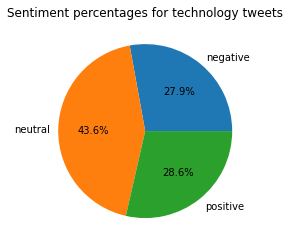

In [ ]:
import matplotlib.pyplot as plt
negative_count = sent.count('negative')
neutral_count = sent.count('neutral')
positive_count = sent.count('positive')
plt.pie(x = [negative_count, neutral_count, positive_count], labels=labels_sentiment, autopct='%1.1f%%')
plt.title("Sentiment percentages for technology tweets")
plt.show()

### Emotion

In [ ]:
task = 'emotion'
model_emotion, tokenizer_emotion, labels_emotion = get_params(task)

In [ ]:
emotion = predict(list(tweets_df["text"]), model_emotion, tokenizer_emotion, labels_emotion, task)

In [ ]:
emot = [emot['emotion'] for emot in emotion]
anger = [emot['anger'] for emot in emotion]
joy = [emot['joy'] for emot in emotion]
optimism = [emot['optimism'] for emot in emotion]
sadness = [emot['sadness'] for emot in emotion]

In [ ]:
tweets_df['emotion_auto'] = emot
tweets_df['anger'] = anger
tweets_df['joy'] = joy
tweets_df['optimism'] = optimism
tweets_df['sadness'] = sadness
tweets_df

,text,sentiment_auto,negative,neutral,positive,emotion_auto,anger,joy,optimism,sadness
0,just put a CD into my MacBook to burn it and m...,positive,0.070,0.398,0.532,joy,0.023,0.921,0.034,0.022
1,oh yeah tesla well what about a car that just ...,neutral,0.241,0.655,0.104,joy,0.416,0.450,0.048,0.086
2,#100DaysOfCode Haven’t updated in a while due ...,neutral,0.261,0.500,0.238,sadness,0.015,0.216,0.078,0.691
3,Finally managed to move my business email from...,positive,0.147,0.296,0.557,optimism,0.048,0.185,0.701,0.066
4,why do I have to take a thermodynamics class w...,negative,0.966,0.031,0.002,anger,0.960,0.006,0.007,0.026
...,...,...,...,...,...,...,...,...,...,...
135,Hey! I’d like to introduce a friend.\n\nPlease...,positive,0.004,0.214,0.782,joy,0.027,0.899,0.059,0.015
136,Day 31 ✅Done\n#100DaysOfCode\n\nFlash Card App...,neutral,0.014,0.749,0.237,joy,0.029,0.774,0.159,0.038
137,i updated my mac and omg its the way it doesn'...,positive,0.002,0.024,0.974,joy,0.023,0.917,0.040,0.021
138,having no sort of WiFi actually sucks,negative,0.958,0.036,0.006,sadness,0.464,0.010,0.006,0.520


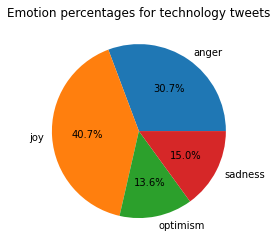

In [ ]:
anger_count = emot.count('anger')
joy_count = emot.count('joy')
optimism_count = emot.count('optimism')
sadness_count = emot.count('sadness')
plt.pie(x = [anger_count, joy_count, optimism_count, sadness_count], labels=labels_emotion, autopct='%1.1f%%')
plt.title("Emotion percentages for technology tweets")
plt.show()

## Wordclouds

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def create_wordcloud(text):
    wc = WordCloud(max_words=100,
        stopwords=STOPWORDS, width = 1000, height = 1000,
        repeat=True, background_color='white', colormap='Set2')
    wc.generate(str(text))
    plt.figure(figsize=(10, 10))
    plt.imshow(wc)
    plt.axis("off")

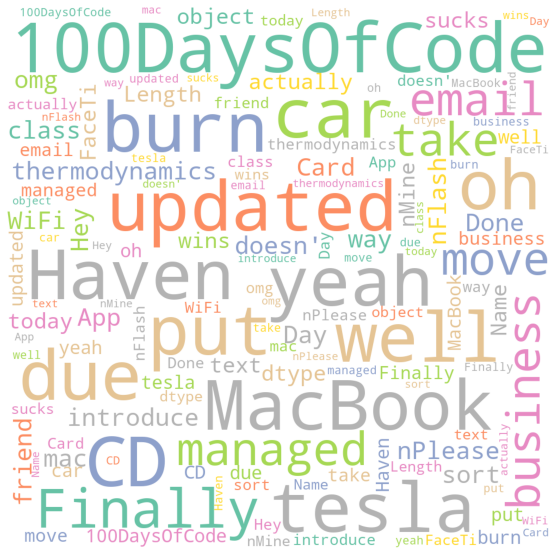

In [ ]:
create_wordcloud(tweets_df["text"])

### Sentiment

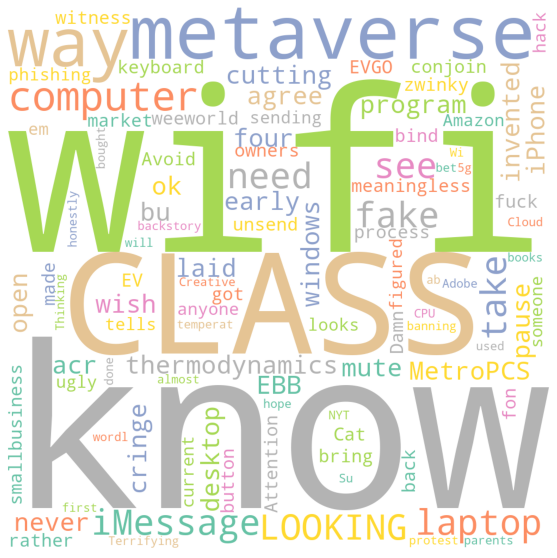

In [ ]:
create_wordcloud(tweets_df[tweets_df["sentiment_auto"] == "negative"]["text"])

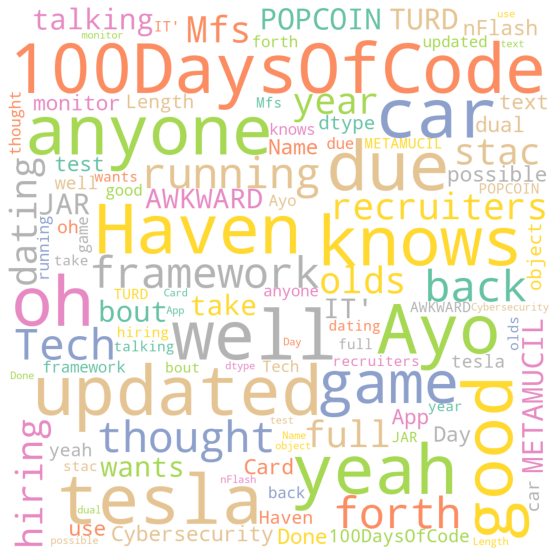

In [ ]:
create_wordcloud(tweets_df[tweets_df["sentiment_auto"] == "neutral"]["text"])

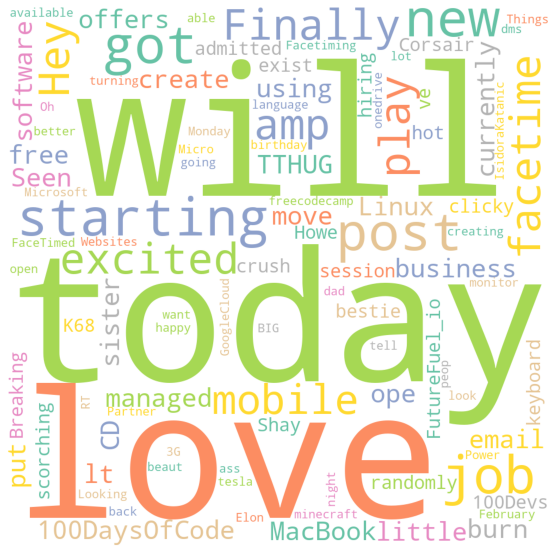

In [ ]:
create_wordcloud(tweets_df[tweets_df["sentiment_auto"] == "positive"]["text"])

### Emotion

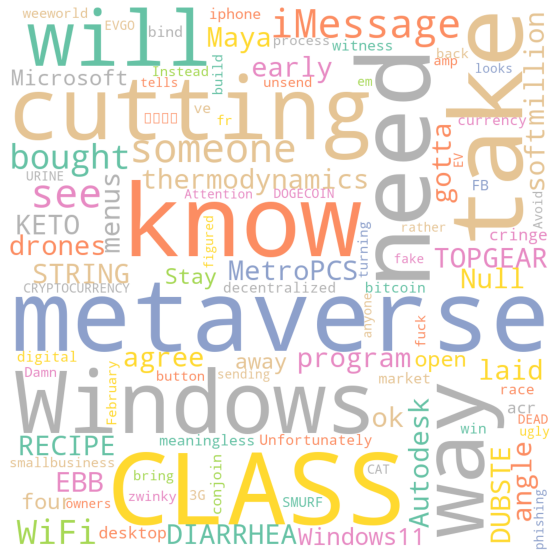

In [ ]:
create_wordcloud(tweets_df[tweets_df["emotion_auto"] == "anger"]["text"])

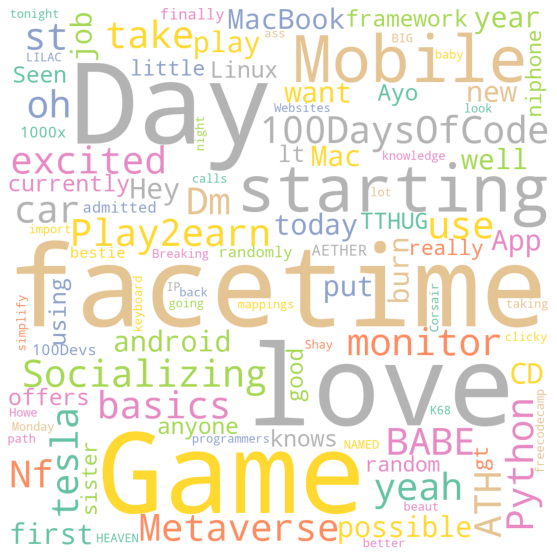

In [ ]:
create_wordcloud(tweets_df[tweets_df["emotion_auto"] == "joy"]["text"])

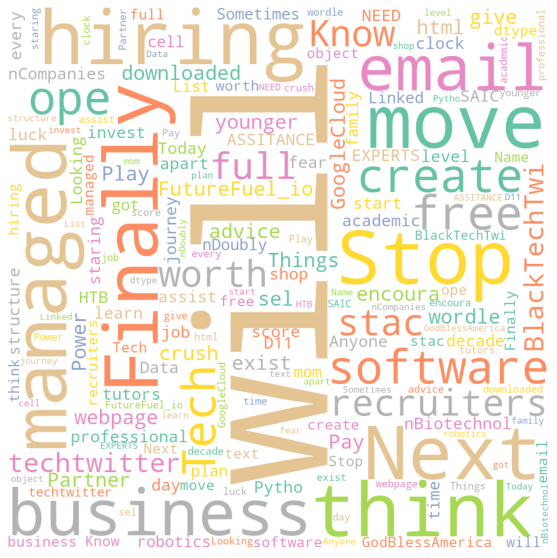

In [ ]:
create_wordcloud(tweets_df[tweets_df["emotion_auto"] == "optimism"]["text"])

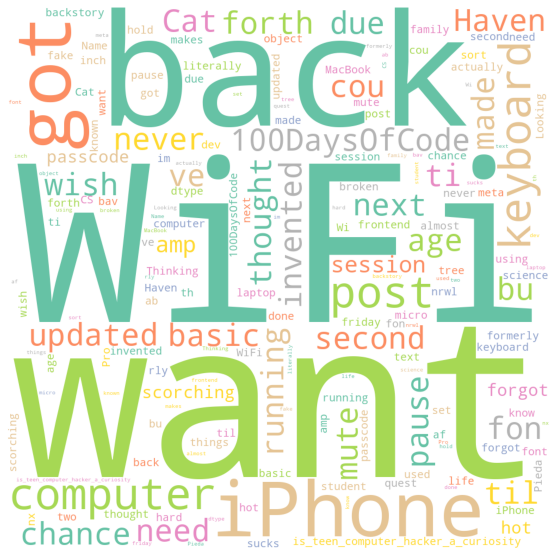

In [ ]:
create_wordcloud(tweets_df[tweets_df["emotion_auto"] == "sadness"]["text"])